In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/data.csv')

In [3]:
df.model_year.unique()

array([2014, 2017, 2011, 2018, 2012, 2019, 1996, 2007, 2008, 2006, 2013,
       1986, 2015, 2010, 1998, 2016, 2020, 2021, 2000, 2009, 2003, 2005,
       2004, 2002, 1989, 1999, 2001, 1983, 1982, 1995, 1980, 1981, 1997,
       1970, 1991])

In [4]:
df.sample(10)

,model_name,model_year,kms_driven,owner,location,price
293,Suzuki Gixxer Single Channel ABS,2017,37000.0,1st,Ahmedabad,60000.0
4390,Royal Enfield Classic 350cc ABS Stealth Black BS6,2020,1200.0,1st,Asansol,180000.0
1246,Bajaj Pulsar RS 200 ABS,2015,24500.0,2nd,New Delhi,70000.0
5104,Honda CBR 250R,2013,17000.0,3rd,Kolkata,50300.0
3373,Honda,2015,29818.0,2nd,Delhi,41000.0
704,Bajaj V15 Standard,2018,64854.0,1st,Varanasi,55000.0
2782,Honda,2018,41745.0,1st,Delhi,44000.0
918,Suzuki Access 125 [2007-2016] Standard,2011,30000.0,1st,Mumbai,25000.0
3204,Honda,2016,28943.0,1st,Delhi,39000.0
2726,Yamaha,2018,15314.0,1st,Delhi,75000.0


## Handle model_name

### Let's take only first two words of model_name

In [5]:
df['model_name'] = df['model_name'].apply(lambda x: ' '.join(x.split()[:2]))

In [6]:
df.sample(10)

,model_name,model_year,kms_driven,owner,location,price
5096,Royal Enfield,2015,15182.0,1st,Chennai,110000.0
3333,Honda,2014,58242.0,1st,Delhi,31000.0
1141,Bajaj Pulsar,2015,33000.0,1st,New Delhi,33500.0
4876,TVS Apache,2019,16000.0,1st,Delhi,98000.0
4613,Bajaj Avenger,2016,6790.0,1st,Amritsar,60000.0
2491,TVS Apache,2020,11000.0,1st,North 24 Parganas,100000.0
52,Royal Enfield,2017,24000.0,2nd,Katihar,150000.0
225,TVS Apache,2020,5500.0,1st,Nagapattinam,250000.0
2814,Hero,2014,86247.0,1st,Delhi,34000.0
4469,Bajaj Avenger,2017,14500.0,1st,Thane,75000.0


In [7]:
df.model_name.value_counts()

Royal Enfield     751
Bajaj Pulsar      655
Honda Activa      438
Honda             321
TVS Apache        302
                 ... 
22Kymco Flow        1
Triumph Rocket      1
Yamaha Rx           1
Hyosung GD250R      1
Yamaha Ray-ZR       1
Name: model_name, Length: 200, dtype: int64

### There are too many models, let try to create a brand category using the model name.

In [8]:
df['brand'] = df['model_name'].apply(lambda x: x.split(' ')[0])

In [9]:
df.sample(10)

,model_name,model_year,kms_driven,owner,location,price,brand
4167,Bajaj Pulsar,2011,75000.0,1st,Delhi,25000.0,Bajaj
3095,Hero,2017,55133.0,1st,Delhi,44000.0,Hero
5450,Bajaj Pulsar,2017,16200.0,1st,Gurgaon,60000.0,Bajaj
2064,Royal Enfield,2020,7450.0,1st,Chennai,50000.0,Royal
4404,Bajaj Pulsar,2018,26752.0,1st,Chirkunda,59000.0,Bajaj
4294,Yamaha FZs,2014,72000.0,2nd,Amritsar,38800.0,Yamaha
4330,UM Renegade,2017,4000.0,1st,Delhi,120000.0,UM
2124,Honda Activa,2013,50000.0,1st,Chennai,25000.0,Honda
2717,Honda,2019,14547.0,1st,Delhi,58000.0,Honda
2608,Yamaha,2017,19517.0,1st,Delhi,48000.0,Yamaha


In [10]:
# Let's check how may brands we get
print('Unique Brands :',len(df['brand'].unique()))
df['brand'].value_counts()

Unique Brands : 28


Bajaj              1103
Honda              1061
Royal               845
Hero                815
TVS                 677
Yamaha              349
KTM                 309
Suzuki              144
Harley-Davidson      40
Jawa                 33
UM                   27
Kawasaki             16
Benelli              13
Triumph              11
Hyosung              10
Aprilia               9
Husqvarna             8
Mahindra              8
Vespa                 6
Ducati                6
BMW                   3
JAWA                  3
LML                   2
Okinawa               2
22Kymco               1
Fb                    1
Piaggio               1
Indian                1
Name: brand, dtype: int64

### Let's take only top 13 brands as our base brand & make other as 'other' category

In [11]:
top_brands = df['brand'].value_counts().index[:13]

In [12]:
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

In [13]:
df.sample(10)

,model_name,model_year,kms_driven,owner,location,price,brand
2662,Honda,2017,29259.0,1st,Delhi,52000.0,Honda
3624,KTM,2015,47507.0,1st,Delhi,99000.0,KTM
4525,TVS Apache,2020,5500.0,1st,Dehradun,100000.0,TVS
3402,Honda,2017,42650.0,1st,Delhi,44000.0,Honda
5129,Honda CB,2016,39000.0,1st,Hyderabad,53000.0,Honda
894,Honda Aviator,2013,40000.0,1st,Mumbai,30000.0,Honda
4665,Bajaj Pulsar,2019,56000.0,5th,Jaipur,46800.0,Bajaj
4081,Triumph Thunderbird,2017,15000.0,1st,Delhi,1063500.0,other
2848,Royal,2018,34804.0,1st,Delhi,139000.0,Royal
834,Royal Enfield,2019,13000.0,1st,Kundrathur,170000.0,Royal


### Let's change the 'Royal' to 'Royal Enfield' as the actual brand

In [14]:
df['brand'] = df.brand.str.replace('Royal','Royal Enfield')

In [15]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,price,brand
1413,Honda Activa,2020,2000.0,1st,Bhiwadi,85000.0,Honda
4874,Royal Enfield,2019,11000.0,1st,Delhi,165000.0,Royal Enfield
338,TVS Apache,2019,6000.0,1st,Delhi,190000.0,TVS
2072,Royal Enfield,2017,28000.0,1st,Chennai,120000.0,Royal Enfield
2610,TVS,2015,35867.0,1st,Delhi,39000.0,TVS


### Drop the model_name as we can work with the brand only

In [16]:
df = df.drop('model_name',axis=1)

## Handle owner

In [17]:
df.owner.unique()

array(['1st', '3rd', '2nd', '5th', '4th'], dtype=object)

### owner category is pretty much sorted, we can directly encode that using OrdinalEncoding during model building.

## Handle location

In [18]:
print('Total Unique Locations :',len(df.location.unique()))

Total Unique Locations : 430


In [19]:
df.location.value_counts()[:10]

Delhi        1590
Bangalore     559
Mumbai        525
Hyderabad     332
New Delhi     249
Kolkata       190
Jaipur        181
Ahmedabad     174
Chennai       168
Pune          146
Name: location, dtype: int64

### Let's take only top 10 locations as our base categories and make others as 'other' category

In [20]:
top_locations = df.location.value_counts().index[:10]

In [21]:
df['location'] = df.location.apply(lambda x: x if x in top_locations else 'other')

In [22]:
df.sample(10)

,model_year,kms_driven,owner,location,price,brand
2018,2017,11000.0,1st,Bangalore,18000.0,Honda
2867,2017,27497.0,1st,Delhi,51000.0,Bajaj
3029,2019,32083.0,1st,Delhi,61000.0,Hero
1453,2019,5500.0,1st,Mumbai,18500.0,Honda
589,2020,5300.0,1st,Pune,220000.0,Bajaj
4261,2018,6200.0,1st,Chennai,68500.0,Bajaj
5363,2016,16000.0,1st,Jaipur,136400.0,Royal Enfield
288,2009,39000.0,1st,other,35000.0,Hero
4676,2010,46000.0,1st,other,22000.0,Hero
906,2020,2000.0,1st,other,140000.0,Yamaha


In [23]:
# Recorder the column
# new_order = ['brand','model_year','kms_driven','owner','location','price']
new_order = [5,0,1,2,3,4]
df = df[df.columns[new_order]]

In [24]:
df.sample()

,brand,model_year,kms_driven,owner,location,price
4292,Royal Enfield,2015,24000.0,1st,Bangalore,115000.0


In [25]:
# make the price as int data type
df['price'] = df['price'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5504 entries, 0 to 5503
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       5504 non-null   object 
 1   model_year  5504 non-null   int64  
 2   kms_driven  5504 non-null   float64
 3   owner       5504 non-null   object 
 4   location    5504 non-null   object 
 5   price       5504 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 258.1+ KB


## Outlier Detection

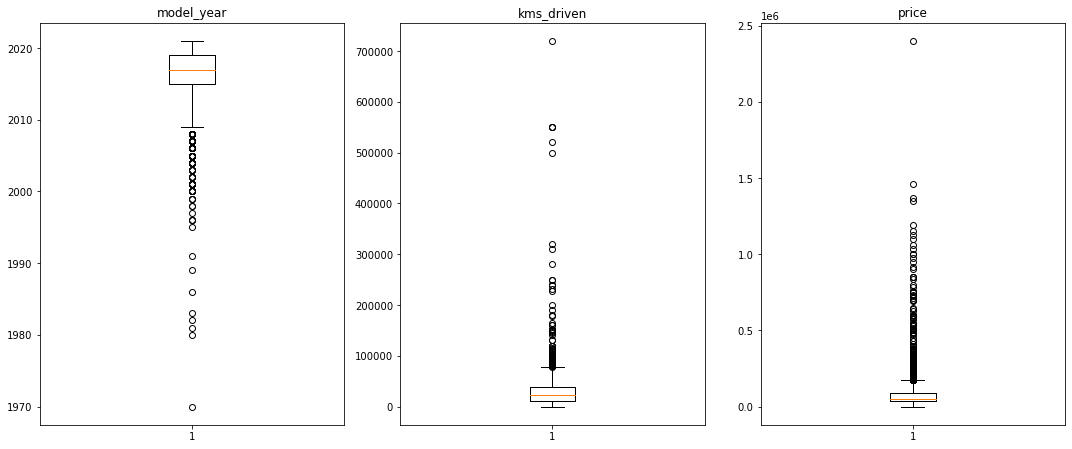

In [27]:
def box_plot(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

    # outlier detection using boxplot
    plt.figure(figsize=(20,30))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(5,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

box_plot(df)

In [28]:
new_df = df[~(df['kms_driven'] >= 50000)]

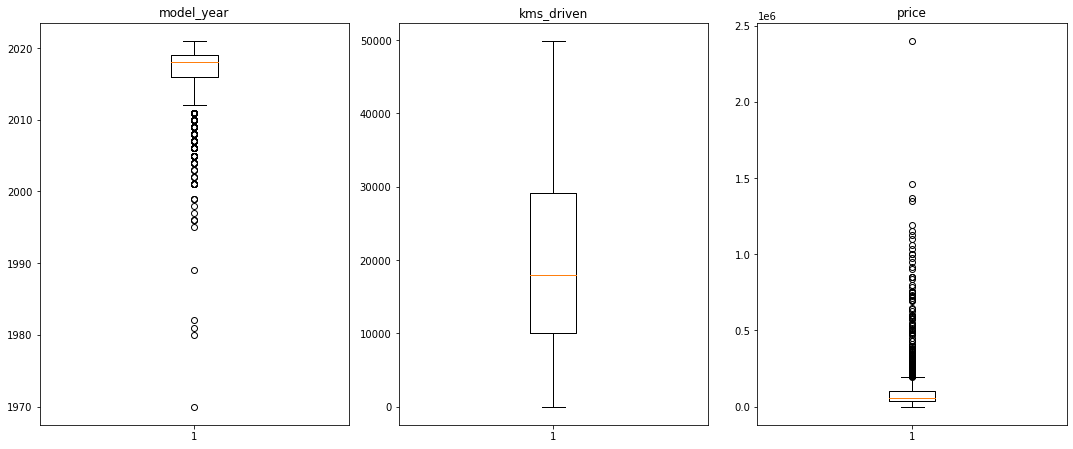

In [29]:
box_plot(new_df)

In [30]:
new_df = new_df[new_df['price'] <= .5e6]

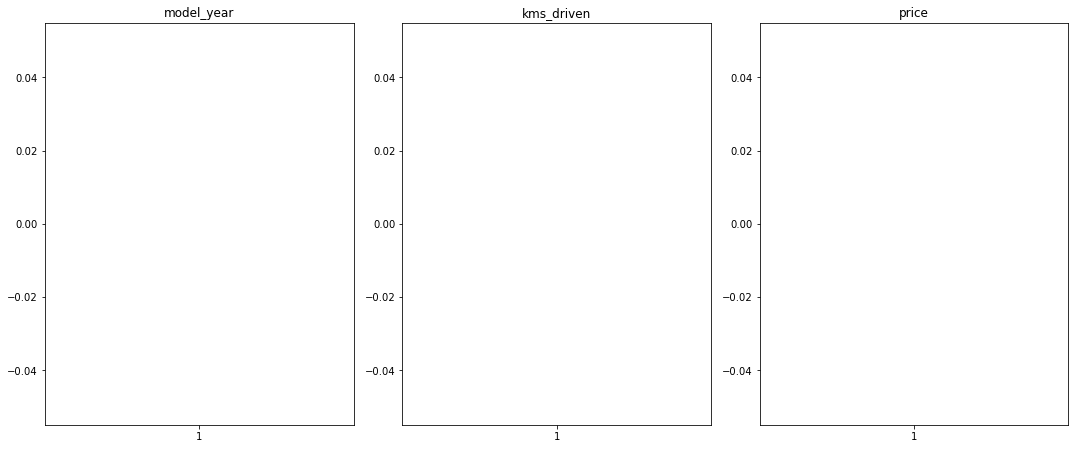

In [31]:
box_plot(new_df)

In [32]:
new_df = new_df[new_df['model_year'] >= 2000]
new_df.shape

(0, 6)

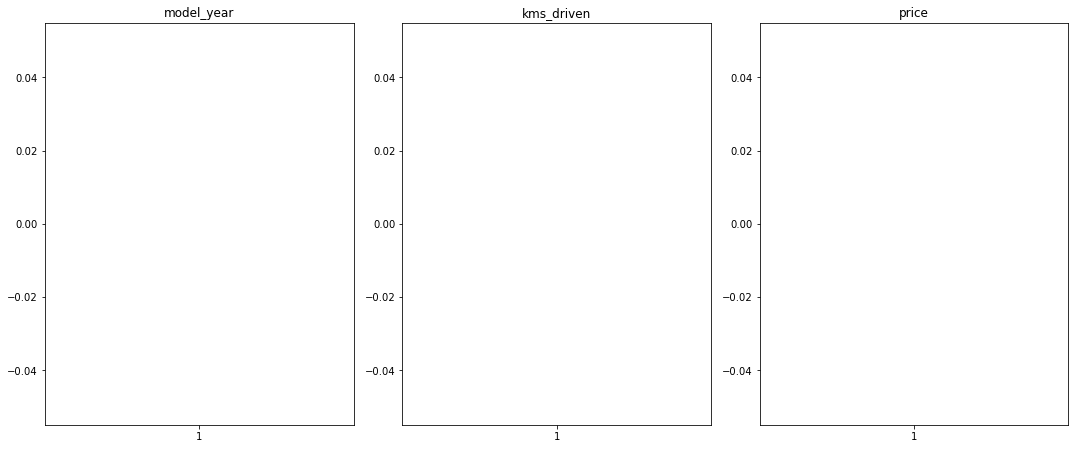

In [33]:
box_plot(new_df)

In [34]:
new_df.describe()

,model_year,kms_driven,price
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [35]:
## Save the processed data
df = new_df
df.to_csv('../data/processed/processed.csv',index=False)